### Group 1 Members
#### Peter Mbuthia
#### Marion Macharia
#### Mitch Mathiu
#### Mercy Jepkogei


In [ ]:
# import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
nltk.download("stopwords")
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# load the dataset
sentiment_tweet = pd.read_csv("/content/judge-1377884607_tweet_product_company.csv", encoding= "latin-1")
sentiment_tweet.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
# Make a copy for manipulation

df = sentiment_tweet.copy()

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [ ]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [ ]:
# Rename the columns for easier reference

df.rename(columns= {
          "tweet_text" : "tweets",
          "emotion_in_tweet_is_directed_at": "product_type",
          "is_there_an_emotion_directed_at_a_brand_or_product" : "emotion_type"
          }, inplace=True)



In [ ]:
df.head()

,tweets,product_type,emotion_type
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [ ]:
# Find the missing values
df.isnull().sum()

,0
tweets,1
product_type,5802
emotion_type,0


## Handling Duplicates

In [ ]:
df.duplicated().sum()



22

In [ ]:
df.drop_duplicates(subset= "tweets" , inplace=True)

In [ ]:
df.duplicated().sum()

0

## Handling Missing Values

In [ ]:
df.isnull().sum()

,0
tweets,1
product_type,5786
emotion_type,0


In [ ]:
df.dropna(subset=['tweets'], inplace=True)


## Check the Distribution of Products

In [ ]:
# create a products variable to establish unique values in the emotion_in_tweet_is_directed_at column

# Check the unique values in the product_type column
products_list = df["product_type"].unique()
products_list

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [ ]:
# Remove the Nan values
products_list = [product_type for product_type in products_list if str(product_type) != "nan"]
products_list

['iPhone',
 'iPad or iPhone App',
 'iPad',
 'Google',
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

In [ ]:
# Check the distribution count after removing the nan
df["product_type"].value_counts()

,count
product_type,
iPad,943
Apple,659
iPad or iPhone App,469
Google,428
iPhone,296
Other Google product or service,293
Android App,80
Android,77
Other Apple product or service,35


In [ ]:

def extract_product(tweet):
    for product in products_list:
        if product.lower() in tweet.lower():
            return product
    return None

df["product_type"] = df.apply(lambda x: extract_product(x["tweets"]) if pd.isna(x["product_type"]) else x["product_type"], axis=1)

df.head(10)

,tweets,product_type,emotion_type
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,iPad,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [ ]:
# Check the percentage of missing values

missing_values_percentage = (df["product_type"].isnull().sum() / len(df)) * 100
print(missing_values_percentage)

8.372862658576945


In [ ]:
 # Fill in the missing product_type values with None

df["product_type"].fillna("None", inplace=True)

<ipython-input-19-f05c17f3a060>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["product_type"].fillna("None", inplace=True)


In [ ]:

df["product_type"].value_counts()

,count
product_type,
iPad,2435
Google,2143
Apple,1347
iPhone,1211
None,759
iPad or iPhone App,469
Android,293
Other Google product or service,293
Android App,80


In [ ]:
df["emotion_type"].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [ ]:
# Drop 'I can't tell' from emotion_type
df = df[df["emotion_type"] != "I can't tell"]

In [ ]:
# check if the 759 missing values are among the dropped emotion_type

df[df["product_type"]== "None"]["emotion_type"].value_counts()


,count
emotion_type,
No emotion toward brand or product,739
Positive emotion,13
Negative emotion,1


# Preprocessing

In [ ]:
# Create a new column with Sentiment column with (positve, negative and neutral)
df.loc[:, "sentiment"] = df["emotion_type"].apply(lambda x: "positive" if x == "Positive emotion" else ("negative" if x == "Negative emotion" else "neutral"))

<ipython-input-25-1ee7e82b3e76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='product_type', data=df, order=df['product_type'].value_counts().index, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949:

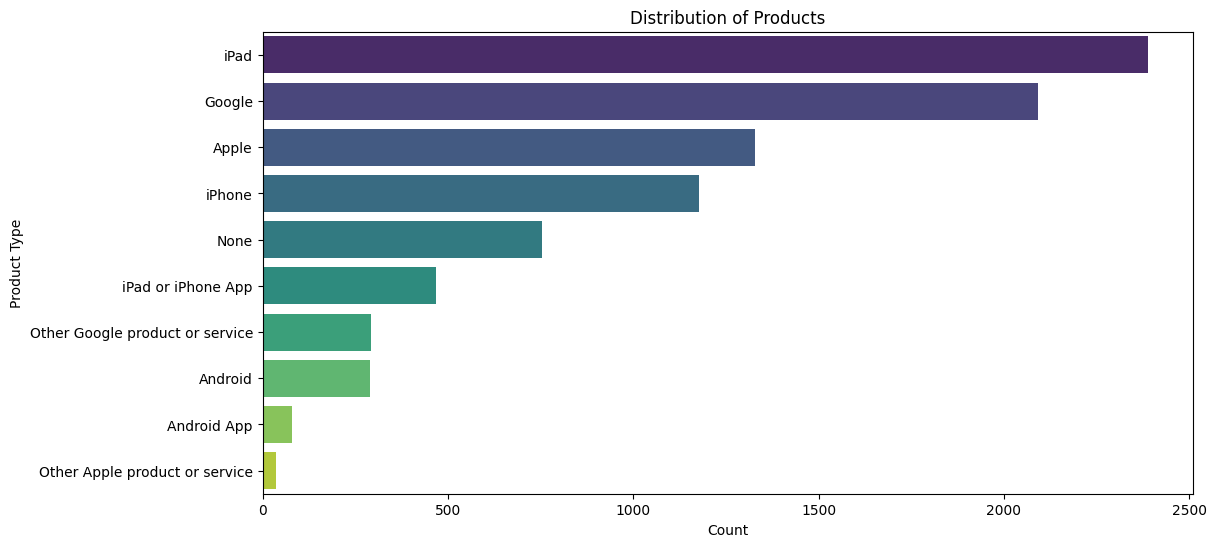

In [ ]:
# Plot the distribution of products without hue
plt.figure(figsize=(12, 6))
sns.countplot(y='product_type', data=df, order=df['product_type'].value_counts().index, palette="viridis")
plt.title('Distribution of Products')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


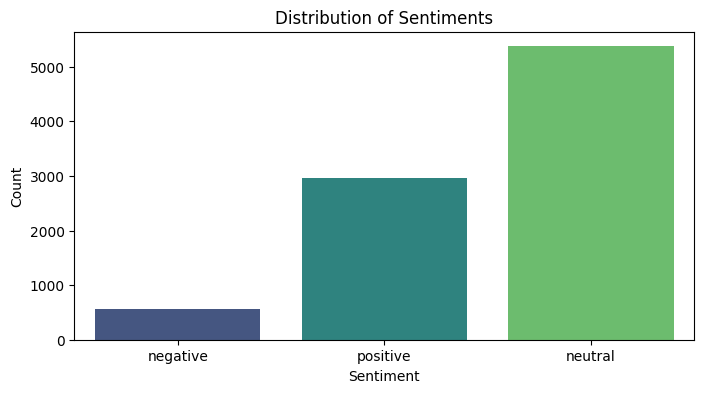

In [ ]:
#Distribution of sentiments
plt.figure(figsize=(8, 4))
sns.countplot(x='sentiment', data=df, hue= 'sentiment', palette="viridis")
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


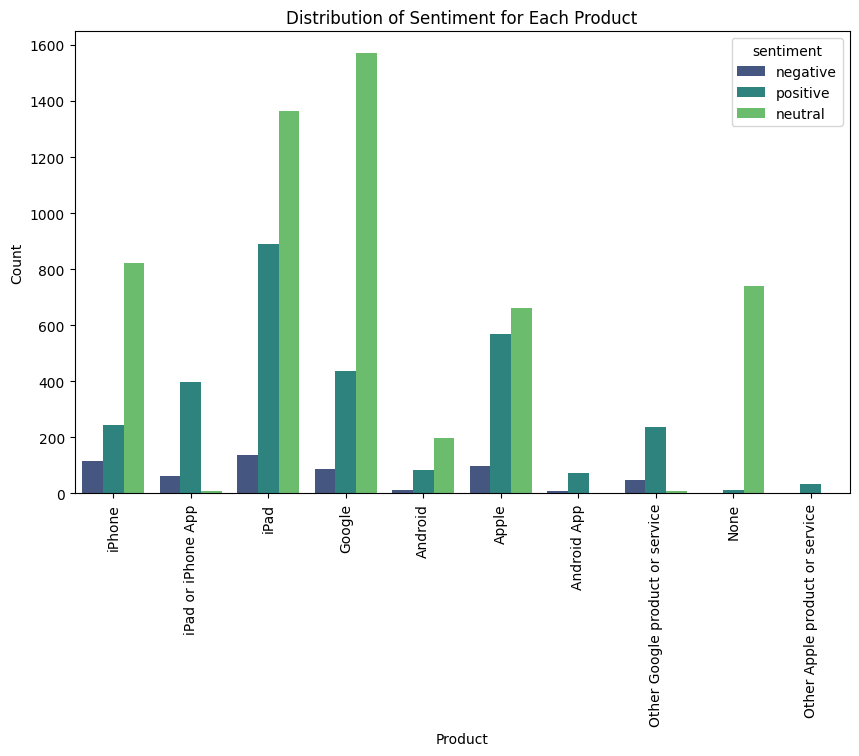

In [ ]:
#Distribution of sentiment for each product using a stacked barplot

plt.figure(figsize=(10, 6))
sns.countplot(x='product_type', hue='sentiment', data=df, palette="viridis")
plt.title('Distribution of Sentiment for Each Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

 ### The plot above demonstrates that the distribution of neutral sentiments across the product is high. This may be as a result of a class imbalance, whereby the number of neutral sentiments are more than those of either positive or negative. According to the plot, the ipad product has the highest positive sentiment of 900 whilst the highest negative sentiments are observed to affect the iphone product.  

In [ ]:
# Clean the tweets a=of irrelevant articles

import re
# Function to clean tweet text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the tweets
df['cleaned_tweets'] = df['tweets'].apply(clean_text)

# Display the first 10 cleaned tweets
df[['tweets', 'cleaned_tweets']].head(5)

,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,I have a G iPhone After hrs tweeting at it was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about Awesome iPadiPhone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for also They should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,I hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri Marissa Mayer Google Tim OR...


In [ ]:
# Convert cleaned tweets to lowercase
df['cleaned_tweets'] = df['cleaned_tweets'].str.lower()

# Display the first 10 lowercased tweets
df[['tweets', 'cleaned_tweets']].head(5)

,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,i have a g iphone after hrs tweeting at it was...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know about awesome ipadiphone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,can not wait for also they should sale them do...
3,@sxsw I hope this year's festival isn't as cra...,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on fri marissa mayer google tim or...


In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply stopwords removal
df['cleaned_tweets'] = df['cleaned_tweets'].apply(remove_stopwords)

df[['tweets', 'cleaned_tweets']].head(5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting dead need upgrade plugin...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...


In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize # Import the word_tokenize function
# Tokenize the cleaned tweets
df['tokens'] = df['cleaned_tweets'].apply(word_tokenize)

df[['tweets', 'cleaned_tweets', 'tokens']].head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweets,cleaned_tweets,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hrs tweeting dead need upgrade plugin...,"[g, iphone, hrs, tweeting, dead, need, upgrade..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app,"[hope, years, festival, isnt, crashy, years, i..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...,"[great, stuff, fri, marissa, mayer, google, ti..."


In [ ]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer # Import the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)


df[['tokens', 'lemmatized_tokens']].head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tokens,lemmatized_tokens
0,"[g, iphone, hrs, tweeting, dead, need, upgrade...","[g, iphone, hr, tweeting, dead, need, upgrade,..."
1,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,"[wait, also, sale]","[wait, also, sale]"
3,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


# Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                   max_features=5000,
                                   stop_words='english',
                                   min_df=5,
                                   max_df=0.8)

# Fit and transform the tweets into a vectorized format
X = tfidf_vectorizer.fit_transform(df['cleaned_tweets'])

# Check the shape of the resulting vectorized data
print("Shape of the TF-IDF matrix:", X.shape)

Shape of the TF-IDF matrix: (8909, 3634)


In [ ]:
# Reduce the sparsity by using biggram coupling the words in twos
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

X_bigrams = bigram_vectorizer.fit_transform(df['cleaned_tweets'])

bigram_counts = X_bigrams.sum(axis=0)
bigram_freq = pd.DataFrame(bigram_counts.T, index=bigram_vectorizer.get_feature_names_out(), columns=['count'])

bigram_freq = bigram_freq.sort_values(by='count', ascending=False)

# Select the top 10 bigrams
top_bigrams = bigram_freq.head(10)
top_bigrams

,count
apple store,520
social network,436
new social,404
popup store,317
network called,313
google launch,301
today link,293
rt google,287
major new,284
called circles,283


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

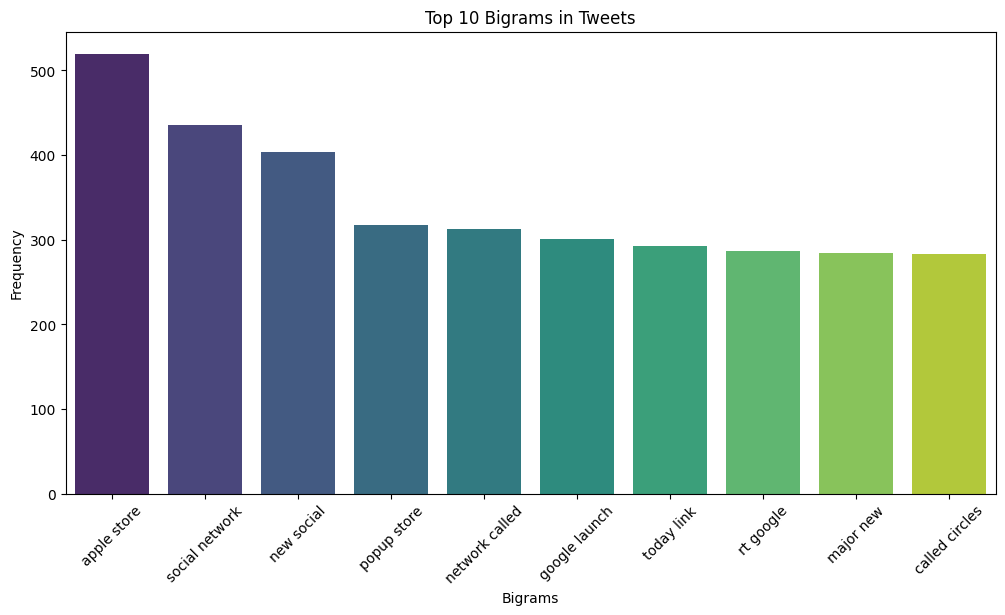

In [ ]:
# Plotting the top bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bigrams.index, y=top_bigrams['count'], hue= top_bigrams.index, palette='viridis')
plt.title('Top 10 Bigrams in Tweets')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### The plot above demonstrates the most used phrase among the tweets showcasing apple store with the highest frequency/appearance of (520), followed by social network (436), and the tenth phrase as called circles(283). This affirms that majority of the tweets references mostly 'apple store'.

In [ ]:
df.head()

,tweets,product_type,emotion_type,sentiment,cleaned_tweets,tokens,lemmatized_tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,negative,g iphone hrs tweeting dead need upgrade plugin...,"[g, iphone, hrs, tweeting, dead, need, upgrade...","[g, iphone, hr, tweeting, dead, need, upgrade,..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,positive,know awesome ipadiphone app youll likely appre...,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,positive,wait also sale,"[wait, also, sale]","[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,negative,hope years festival isnt crashy years iphone app,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,positive,great stuff fri marissa mayer google tim oreil...,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


#Modeling

## From the sklearn library, use the train_test split method with a random state of 42 and a test size of 0.2 to initialize a logistic regression model and evaluate its performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['sentiment'], test_size=0.2, random_state=42)

# Create a TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

## Use Logistic Regression as a baseline model and evaluate the accuracy of the model

In [ ]:
# Build and train a Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.6694725028058361
              precision    recall  f1-score   support

    negative       0.37      0.60      0.46       123
     neutral       0.79      0.71      0.75      1069
    positive       0.58      0.62      0.60       590

    accuracy                           0.67      1782
   macro avg       0.58      0.64      0.60      1782
weighted avg       0.69      0.67      0.68      1782



### The logistic regression model has an accuracy performance of 67 with precision scores of positive and negative at 58 and 37 respectively. The neutral score is higher with a score of 79, despite the application of the class weight balance strategy to counter the potential class imbalance.

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# Train the model on the resampled data
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.6666666666666666
              precision    recall  f1-score   support

    negative       0.38      0.50      0.43       123
     neutral       0.76      0.73      0.75      1069
    positive       0.58      0.58      0.58       590

    accuracy                           0.67      1782
   macro avg       0.57      0.61      0.59      1782
weighted avg       0.68      0.67      0.67      1782



### The use of Synthetic Minority Over-sampling Technique(SMOTE) / Undersampling only improves the negative precision score by one from 37 to 38. The accuracy score remains at 67.  

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of lambda)
    'solver': ['liblinear', 'saga'],  # Solvers for small datasets or large datasets
    'class_weight': [None, 'balanced']  # Option to handle class imbalance
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='f1_macro',  # Use F1 macro to balance all classes
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best Cross-validation Score: 0.5735161216037361
Test Accuracy: 0.6947250280583613
Classification Report:
              precision    recall  f1-score   support

    negative       0.49      0.37      0.42       123
     neutral       0.75      0.79      0.77      1069
    positive       0.62      0.58      0.60       590

    accuracy                           0.69      1782
   macro avg       0.62      0.58      0.60      1782
weighted avg       0.69      0.69      0.69      1782



The results show that the logistic regression model, optimized with hyperparameter tuning (C=10, class_weight='balanced', solver='liblinear'), achieved a cross-validation F1-macro score of 0.5735 and test accuracy of 69.47%. However, the model performs well for the neutral class (F1-score = 0.77) but struggles with the minority negative and positive classes, particularly negative (F1-score = 0.42). This imbalance skews overall performance, as seen in the macro average F1-score of 0.60. To improve, consider exploring alternative models like SVM or ensemble methods. Feature engineering with n-grams or word embeddings may also enhance performance.

### Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel choice (linear or radial basis function)
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm,
                               scoring='f1_macro',  # F1-macro to balance class performance
                               cv=5,  # 5-fold cross-validation
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV for SVM
grid_search_svm.fit(X_train_tfidf, y_train)

# Print best parameters and performance
print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Cross-validation Score (SVM):", grid_search_svm.best_score_)

# Evaluate SVM on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_tfidf)

# Performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Test Accuracy: {accuracy_svm}")
print(f"SVM Classification Report:\n{report_svm}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters (SVM): {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
Best Cross-validation Score (SVM): 0.5628604213459656
SVM Test Accuracy: 0.67003367003367
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.38      0.49      0.42       123
     neutral       0.78      0.72      0.75      1069
    positive       0.58      0.62      0.60       590

    accuracy                           0.67      1782
   macro avg       0.58      0.61      0.59      1782
weighted avg       0.68      0.67      0.68      1782



### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of each tree
    'class_weight': [None, 'balanced', 'balanced_subsample']  # Handling class imbalance
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              scoring='f1_macro',  # F1-macro to balance performance across all classes
                              cv=5,  # 5-fold cross-validation
                              verbose=1,
                              n_jobs=-1)

# Fit GridSearchCV for Random Forest
grid_search_rf.fit(X_train_tfidf, y_train)

# Print best parameters and performance
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Cross-validation Score (Random Forest):", grid_search_rf.best_score_)

# Evaluate Random Forest on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_tfidf)

# Performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Test Accuracy: {accuracy_rf}")
print(f"Random Forest Classification Report:\n{report_rf}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters (Random Forest): {'class_weight': 'balanced_subsample', 'max_depth': 30, 'n_estimators': 300}
Best Cross-validation Score (Random Forest): 0.5380663389542575
Random Forest Test Accuracy: 0.6677890011223344
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.24      0.32       123
     neutral       0.72      0.80      0.76      1069
    positive       0.58      0.52      0.55       590

    accuracy                           0.67      1782
   macro avg       0.58      0.52      0.54      1782
weighted avg       0.65      0.67      0.66      1782

